<a href="https://colab.research.google.com/github/medeiroscimario/projeto_analise_de_dados_wind_turbine/blob/main/Projeto_%7C_An%C3%A1lise_de_dados_%7C_Wind_Turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto em análise de dados | Kaggle | Wind Turbine Scada Dataset

## Python | Pandas | Matplotlib | Seaborn


### Dicionário dos dados

- **Data/Hora (para intervalos de 10 minutos)**
- **LV ActivePower (kW):** A potência gerada pela turbina naquele momento
- **Velocidade do Vento (m/s):** A velocidade do vento na altura do eixo da turbina (a velocidade do vento que a turbina usa para a geração de eletricidade)
- **Curva de Potência Teórica (KWh):** Os valores teóricos de potência que a turbina gera com aquela velocidade do vento, conforme fornecido pelo fabricante da turbina
- **Direção do Vento (°):** A direção do vento na altura do eixo da turbina (as turbinas eólicas giram automaticamente para essa direção)


### Análise

In [ ]:
# Projeto na área de análise de dados, a fim de solidificar os conceitos passados em sala de aula, sobre as tecnologias Python, Pandas e Matplotlib.
# O projeto trata em específica de uma análise de um banco de dados baixado através do Kaggle, 'https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset?resource=download', que trata sobre dados de uma turbina de capatação de energia heólica.
# O projeto foi realizado em conjunto com a aula do curso da Hastag Programação.

In [ ]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
# Lendo o arquivo

turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/hora', 'Potência (kw)', 'Velocidade do Vento (m/s)', 'Curva teórica (Kwh)', 'Direção do vento (º)']
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'], format='%d %m %Y %H:%M')
display(turbina)

# O comando display é uma função que exibe o DataFrame completo ou o objeto específico no notebook (como Google Colab ou Jupyter Notebook) de forma mais "bonita" e organizada. Ele utiliza o IPython para renderizar a saída de forma mais rica, especialmente em notebooks.
# O comando head é um método específico do pandas que retorna as primeiras N linhas do DataFrame (por padrão, as primeiras 5 linhas). Ele é útil para inspecionar rapidamente o início de um DataFrame sem a necessidade de exibir tudo.
# turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora']) -> Transformação em datetime.

,Data/hora,Potência (kw),Velocidade do vento (m/s),Curva teórica (Kwh),Direção do vento (º)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Potência (kw)'>

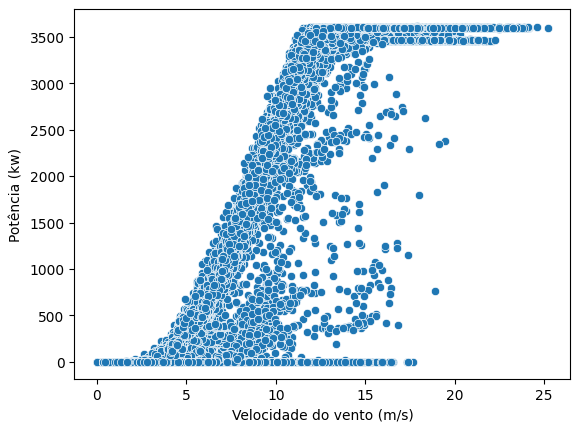

In [ ]:
# Plotando os dados em um gráfico | Curva real

sns.scatterplot(data=turbina, x='Velocidade do vento (m/s)', y='Potência (kw)')

# A função scatterplot da biblioteca seaborn precisa dos seguintes argumentos: os dados, o eixo X e o eixo Y.
# Com o gráfico abaixo eu consigo interpretar que, a partir da velocidade do vento, o quanto estava sendo gerado de energia. Em que pese em determinados momentos tinhamos uma velocidade de vento boa, mas não tínhamos geração de potência.

<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Curva teórica (Kwh)'>

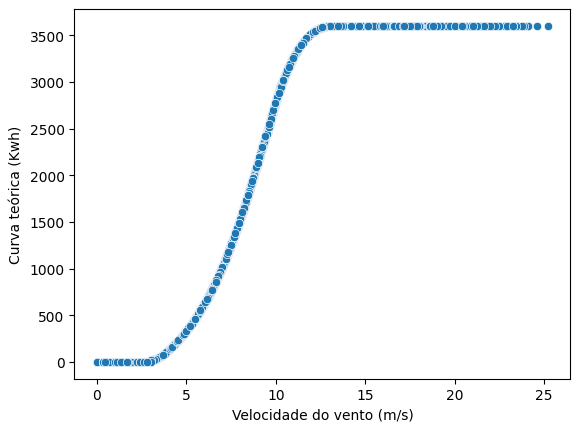

In [ ]:
# Plotando os dados em um gráfico | Curva teórica
# Ou seja, é o quanto se espera que a turbina gere de energia.

sns.scatterplot(data=turbina, x='Velocidade do vento (m/s)', y='Curva teórica (Kwh)')

# Logo, aproximadamente, a partir de 11 m/s de velocidade, a turbina já deveria estar produzindo o máximo de potência.

In [ ]:
# Criando "limites aceitáveis"
# Com base na curva teórica, definiremos um limite aceitável de 5%. Isso significa que nossa curva real pode ter uma margem de erro aceitável de até 5% para mais ou para menos. Se os valores ultrapassarem essa margem, os dados devem ser analisados com maior cautela.
# Primeiro, para criar as curvas, preciso gerar listas que armazenem os valores de potência da curva teórica, ajustando-os em ±5%.

pot_real = turbina['Potência (kw)'].tolist()
pot_teorica = turbina['Curva teórica (Kwh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia * 1.05)
    pot_min.append(potencia * 0.95)

# print(len(pot_max), len(pot_min), len(pot_real))

# O loop for percorrerá cada valor de potência na lista pot_teorica, multiplicando-o por 1,05 para adicionar os 5% e armazenando o resultado na lista pot_max. Da mesma forma, ele calculará a pot_min multiplicando por 0,95 para reduzir os 5%.
# Depois passo o len, para verificar se todos os valores foram afetados de maneira igual.

for p, potencia in enumerate(pot_real):
   if potencia >= pot_min[p] and potencia <= pot_max[p]:
      dentro_limite.append('dentro')
   elif potencia == 0:
      dentro_limite.append('zero')
   else:
      dentro_limite.append('fora')

print(dentro_limite.count('dentro')/len(dentro_limite))

0.37286760340391845


In [ ]:
# Adicionando lista "dentro_limite" ao dataframe

turbina['Dentro do limite'] = dentro_limite
display(turbina)

,Data/hora,Potência (kw),Velocidade do vento (m/s),Curva teórica (Kwh),Direção do vento (º),Dentro do limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,fora
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,dentro


<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Potência (kw)'>

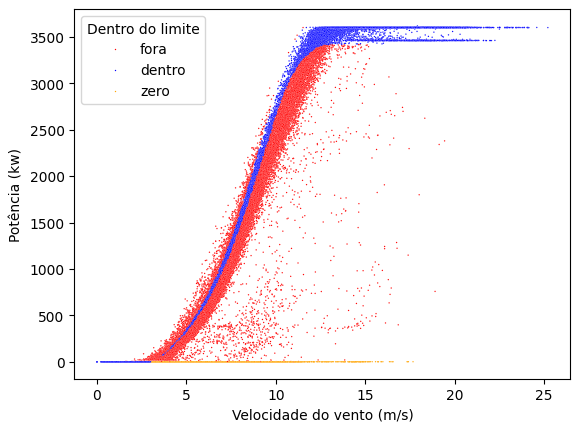

In [ ]:
# Plotando o gráfico

cores = {'dentro':'blue', 'fora':'red', 'zero':'orange'}
sns.scatterplot(data=turbina, x='Velocidade do vento (m/s)', y='Potência (kw)', hue='Dentro do limite', s=1, palette=cores)

# Isso sugere que, mesmo em condições ideais de vento, a turbina pode estar perdendo eficiência ou enfrentando variabilidades operacionais.
# Os pontos laranja no gráfico indicam situações em que a potência gerada é zero, independentemente da velocidade do vento. Isso pode ser uma indicação de falhas operacionais ou períodos em que a turbina foi desligada (por exemplo, para manutenção ou por razões de segurança). Além disso, há uma concentração de pontos azul e vermelho na parte superior do gráfico (potências acima de 3000 kW), o que sugere que a turbina atinge frequentemente sua capacidade máxima.